In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
point = np.linspace(1,10)
tendance = np.log(point)
periodicite = np.cos(point)
noise = np.random.rand(len(point))
ts = periodicite+tendance+noise

### Notre série temporelle

<AxesSubplot:>

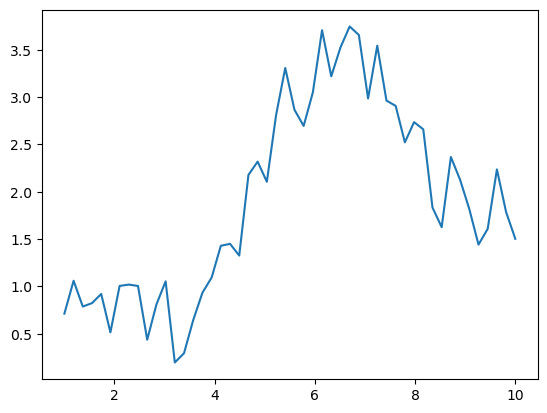

In [5]:
sns.lineplot(x=point, y=ts)

# Extraction de la tendance

# Moyenne mobile

Avec pandas :

<AxesSubplot:>

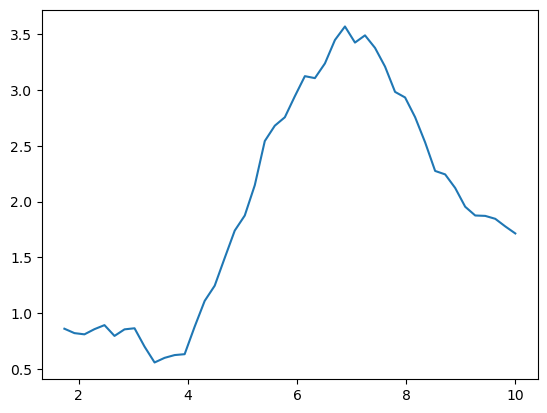

In [18]:
ts_pandas = pd.Series(ts)
average_mean = ts_pandas.rolling(window=5).mean()
sns.lineplot(x=point, y=average_mean)

Avec numpy :

<AxesSubplot:>

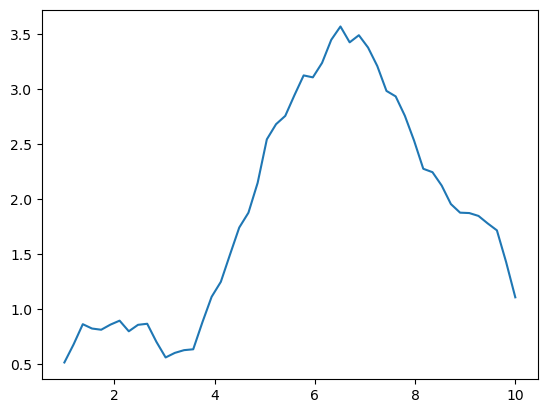

In [27]:
np_average_mean = np.convolve(ts, np.ones(5)/5, mode='same')
sns.lineplot(x=point, y=np_average_mean)

- Numpy permet de choisir le filtre exact appliqué (moyenne pondérée,...)
- Pandas a de nombreuses fonctions de fenêtre déjà implémentées
- Pandas maintient l'intervalle de départ
- Effet de bords

In [ ]:
ts_pandas = pd.Series(ts)
average_mean = None
sns.lineplot(point, average_mean)

Extraction du comportement 'stationnaire'

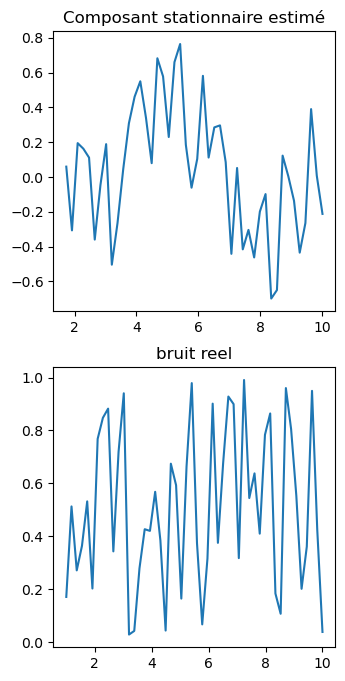

In [30]:
fig = plt.figure(figsize=(8,8))
plt.subplot(221)
sns.lineplot(x=point, y=ts-average_mean)
plt.title("Composant stationnaire estimé")
plt.subplot(223)
sns.lineplot(x=point, y=noise)
plt.title("bruit reel")
plt.show()

- mauvaise approximation car la moyenne mobile a pris en compte une partie de la saisonalité
- plus la fenetre est grande, plus le risque est important
- on n'a pas assez de valeurs pour arriver à isoler uniquement la tendance ou tendance et saisonalité, comme l'ordre de grandeur de la saisonalité est proche du nombre de point que l'on a

## Différentiation

In [ ]:
ts_dif = None
point_dif = np.linspace(1.1,9.9,49)
sns.lineplot(point_dif, ts_dif)

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
sns.lineplot(point_dif,ts_dif)
plt.title("Difference entre la différentiation et le bruit réel")
plt.subplot(223)
sns.lineplot(point,noise)
plt.title("bruit reel")
plt.show()

- Proche mais pas parfait
- les pics marqués sont similaires, mais l'amplitude reste influencée par la tendance et saisonalité

- Avec pandas :

In [ ]:
sns.lineplot(points, None)

- différents lags

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.subplot(221)
sns.lineplot(np.linspace(1.2,9.8,48),ts[2:]-ts[:-2])
plt.title("Lag 2")
plt.subplot(223)
sns.lineplot(point,noise)
plt.title("bruit reel")
plt.show()

In [ ]:
sns.lineplot(points, None)

# Outils automatiques

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

None

- ne pas croire tout ce que vous sort ce genre de méthodes

In [ ]:
sns.lineplot(points, None)

On retrouve la même tendance + saisonalité que notre moyenne mobile

# Auto-corrélation

- On a des graphes permettant de détecter l'autocorrélation visuellement (pour un lag donné):

In [ ]:
from pandas.plotting import lag_plot

None

- notre série n'est pas stationnaire car son autocorrélation n'est pas indépendante du temps

In [ ]:
from pandas.plotting import lag_plot

None

notre bruit aléatoire n'a pas l'air corrélé 
- On peut tester automatiquement différents lags

In [ ]:
from pandas.plotting import autocorrelation_plot

None

- attention, ce n'est pas parce que l'on ne voit pas d'autocorrélation pour un certain lag qu'il n'y en a pas
- plus on va vers la droite, moins on a de donnée, donc plus le graphe est à prendre avec des pincettes
- les lignes fixes et pointillées sont les intervalles de confiances à 95% and 99% 

In [ ]:
None

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

None

- la zone en bleu indique la aussi là ou l'autocorrelation n'est pas jugée fiable
- elle a l'avantage de prendre en compte le nombre par rapport au lag, et augmente donc tres vite dans notre exemple

# Autoregression

### Prédiction du point suivant

In [ ]:
from statsmodels.tsa.ar_model import AR
X_train = ts[:-1]
model = None
model_fit = model.fit()

In [ ]:
preds = model_fit.predict(start=len(X_train), end=len(X_train)+98,dynamic=False)

point_preds = np.linspace(10,30,num=99)
ts_true = np.log(point_preds) + np.cos(point_preds) +np.random.rand(len(point_preds))
plt.plot(points, ts)
plt.plot(point_preds, preds, color='red')
plt.plot(point_preds, ts_true, color='green')

- localement fiable, mais plus on s'eloigne moins on est précis comme les erreurs se cumulent
- limité par le nombre de points que l'on a

In [ ]:
X_train = np.append(ts,ts_true[:50])
points_train = np.append(points,point_preds[:50])
model = AR(X_train)
model_fit = model.fit()
preds = model_fit.predict(start=len(X_train), end=len(X_train)+98,dynamic=False)
point_preds = np.linspace(20,40,num=99)
ts_true = np.log(point_preds) + np.cos(point_preds) +np.random.rand(len(point_preds))
plt.plot(points_train, X_train)
plt.plot(point_preds, preds, color='red')
plt.plot(point_preds, ts_true, color='green')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 


model_fit = None
preds = model_fit.predict(start=len(X_train), end=len(X_train)+98,dynamic=False)

plt.plot(points_train, X_train)
plt.plot(point_preds, preds, color='red')
plt.plot(point_preds, ts_true, color='green')

- augmenter le pas est vite couteux, comme ça augmente l'ordre du systeme d'equation à résoudre